# Logistic Regression - Logistic Loss Function

In this lab, we:
- explore the reason the squared error loss is not appropriate for logistic regression
- explore the logistic loss function

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from plt_logistic_loss import  plt_logistic_cost, plt_two_logistic_loss_curves, plt_simple_example
from plt_logistic_loss import soup_bowl, plt_logistic_squared_error
plt.style.use('./deeplearning.mplstyle')

## Squared error function for logistic regression

We have used the **squared error cost function** for **Linear** Regression, which we defined as:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$


The squared error cost had the nice property that following the derivative of the cost leads to the minimum.

In [ ]:
soup_bowl()

<img src="./images/img01.png" style="width:400px"/>

Since this cost function worked well for linear regression, we might want to consider it for logistic regression as well. However, $f_{wb}(x)$ now has a non-linear component, the sigmoid function:   $f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$.   To demonstrate, we can try a squared error cost on the example from a previous lab, now including the sigmoid.

Here is our training data:

In [ ]:
x_train = np.array([0., 1, 2, 3, 4, 5],dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1],dtype=np.longdouble)
plt_simple_example(x_train, y_train)

<img src="./images/img02.png" style="width:500px"/>

Now, let's get a surface plot of the cost using a *squared error cost*:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$ 
 
where: $f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$


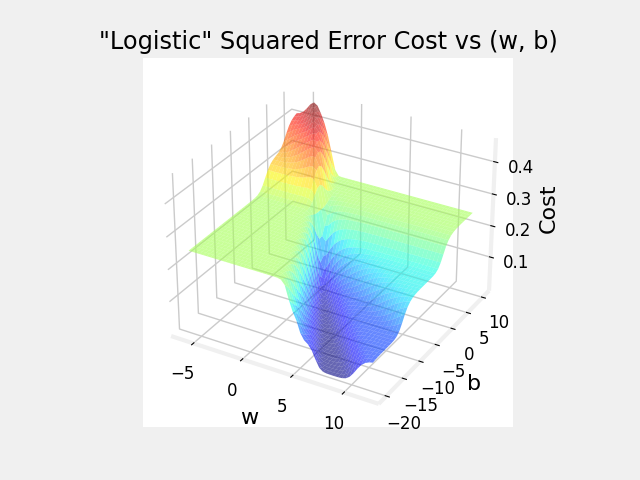

In [5]:
plt.close('all')
plt_logistic_squared_error(x_train,y_train)
plt.show()

<img src="images/img03.png" style="width:500px"/>

While this produces a pretty interesting plot, the surface above is not nearly as smooth as the 'soup bowl' from linear regression!    

Logistic regression requires a cost function that is more suitable for its non-linear nature. This starts with a Loss function (Somehow, this statement matters).

## Logistic Loss Function

Logistic Regression uses a loss function more suited to the task of categorization where the target is 0 or 1 rather than any number. 

>**Note:**
**Loss** is a measure of the difference between a target value and the prediction, while
**Cost** is a measure of the losses over the training set.


This is defined as: 
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ - the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

The defining feature of this loss function is that it uses two separate curves: One for the case where the target is zero ($y=0$), and another for when the target is one ($y=1$). Combined, these curves provide useful behavior for a loss function; being zero when the prediction matches the target, and rapidly increasing when the prediction differs from the target. Consider the curves below:

In [ ]:
plt_two_logistic_loss_curves()

<img src="./images/img04.png" style="width:600px"/>

Taken together, the curves are similar to the quadratic curve of the squared error loss function. Observe that the x-axis is $f_{\mathbf{w},b}$ which is the output of a sigmoid function, which is strictly between 0 and 1.

The loss function above can be rewritten to be easier to implement.

$$
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
$$

where $y^{(i)} = 0, 1$. This allows us to eliminate either term of the equation depending on the value of $y^{(i)}$.

OK, with this new logistic loss function, a cost function can be produced that incorporates the loss from all the examples. This will be the topic of the next lab. For now, we can take a look at the cost vs parameters curve for the simple example we considered above:

In [ ]:
plt.close('all')
cst = plt_logistic_cost(x_train,y_train)

<img src="./images/img05.png" style="width:900px"/>

This curve is well suited for gradient descent! It does not have plateaus, local minima, or discontinuities, but it is *not* a bowl as in the case of squared error cost function. Anyway, both the cost and the log of the cost are plotted to illuminate the fact that the curve, when the cost is small, has a slope and continues to decline. Reminder: you can rotate the above plots using your mouse (sike!).

## Congratulations!  
We have:
 - established that the squared error loss function is not suitable for classification.
 - developed and examined the logistic loss function which **is** suitable for classification.